---
### 9.2.1 统计的基本概念
#### 1. 样本和总体
统计的任务是从样本观察值出发，推断总体的情况——总体分布
#### 2. 频数表和直方图
#### 3. 统计量
统计量是不含未知参数的样本的函数，常用的统计量有
- 描述集中程度和位置的统计量：均值、中位数、众数

- 描述分散或变异程度的统计量：方差、标准差、极差、变异系数

- 表示分布形状的统计量：偏度、峰度

- 协方差和相关系数

- $k$ 阶原点矩和 $k$ 阶中心距

### 9.2.2 用 Python 计算统计量
#### 1. 使用 NumPy 计算统计量
|    函数    | 计算功能 |
| :--------: | :------: |
|   `mean`   |   均值   |
|  `median`  |  中位数  |
|   `ptp`    |   极差   |
|   `var`    |   方差   |
|   `std`    |  标准差  |
|   `cov`    |  协方差  |
| `corrcoef` | 相关系数 |

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('../../09第9章  数据的描述性统计方法/data9_5.txt', header=None).values
data

array([[60, 79, 48, 76, 67, 58, 65, 78, 64, 75, 76, 78, 84, 48, 25, 90,
        98, 70, 77, 78, 68, 74, 95, 80, 90, 78, 73, 98, 85, 56],
       [91, 74, 62, 72, 90, 94, 76, 83, 92, 85, 94, 83, 77, 82, 84, 60,
        80, 78, 88, 90, 65, 77, 89, 86, 56, 87, 66, 56, 83, 67]])

In [2]:
mu = np.mean(data, axis=1)      # 均值
mid = np.median(data, axis=1)   # 中位数
ran = np.ptp(data, axis=1)      # 极差
var = np.var(data, axis=1, ddof=1)  # 方差 ddof for Delta Degrees Of Freedom 影响分母
sig = np.std(data, axis=1, ddof=1)  # 标准差
cov = np.cov(data)              # 协方差矩阵
corr = np.corrcoef(data)        # 相关系数矩阵
print(mu, mid, ran, var, sig, cov, corr, sep='\n\n')

[73.03333333 78.9       ]

[76.  82.5]

[73 38]

[250.10229885 128.50689655]

[15.81462294 11.33608824]

[[250.10229885 -32.65172414]
 [-32.65172414 128.50689655]]

[[ 1.         -0.18213108]
 [-0.18213108  1.        ]]


#### 2. 使用 Pandas 库计算统计量 

In [3]:
df = pd.read_csv('../../09第9章  数据的描述性统计方法/data9_5.txt', header=None)
df = df.T
print(df.describe())
print('-'*28, "\n偏度")
print(df.skew())
print('-'*28, "\n峰度")
print(df.kurt())
print('-'*28, "\n90% 分位数")
print(df.quantile(0.9))

               0          1
count  30.000000  30.000000
mean   73.033333  78.900000
std    15.814623  11.336088
min    25.000000  56.000000
25%    65.500000  72.500000
50%    76.000000  82.500000
75%    79.750000  87.750000
max    98.000000  94.000000
---------------------------- 
偏度
0   -0.921875
1   -0.651461
dtype: float64
---------------------------- 
峰度
0    1.750678
1   -0.615689
dtype: float64
---------------------------- 
90% 分位数
0    90.5
1    91.1
Name: 0.9, dtype: float64


### 9.2.3 统计图
#### 1. 频数表和直方图

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='out'
plt.rcParams['ytick.direction']='out'

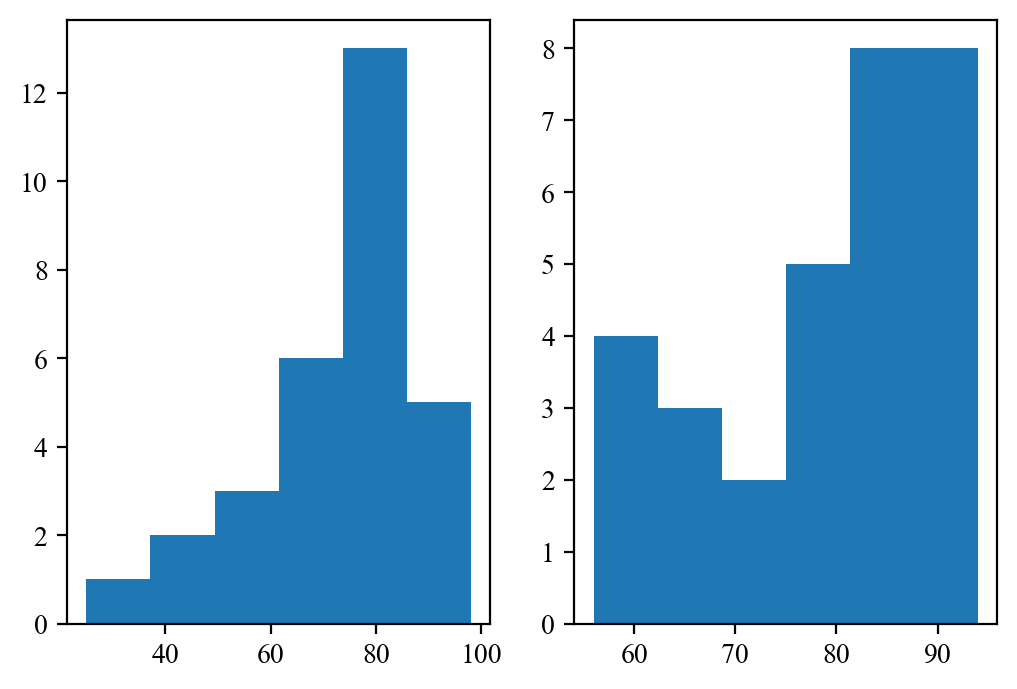

In [5]:
df = pd.read_csv('../../09第9章  数据的描述性统计方法/data9_5.txt', header=None)
df = df.T

fig = plt.figure()
ax = fig.add_subplot(121)
h1 = ax.hist(df[0], 6)

ax1 = fig.add_subplot(122)
h2 = ax1.hist(df[1], 6)
fig.show()

In [6]:
print(np.round(h1[1], 1), h1[0], sep='\n')

[25.  37.2 49.3 61.5 73.7 85.8 98. ]
[ 1.  2.  3.  6. 13.  5.]


#### 2. 箱线图
箱线图是基于以下 5 个数的图形概括：最小值 $\min$，第一四分位数 $Q_1$，中位数 $M$，第三四分位数 $Q_3$ 和最大值 $\max$

从箱线图可以形象地看出数据集的以下重要性质：
- 中心位置：中位数所在位置

- 散布程度：全部数据落在 $[\min, \max]$ 之内，在区间 $[\min, Q_1]$，$[Q_1, M]$，$[M, Q_3]$，$[Q_3, \max]$ 的数据个数各占 $1/4$。区间越短，落在该区间的点越集中，反之越分散

- 关于对称性：若中位数位于箱子的中间位置，则数据分布较为对称

```python
ax.boxplot(x, notch=None, sym=None, vert=None, whis=None)
```
`x`：输入的数据

`notch`：是否创建有凹口的箱盒

`sym`：设置异常点的颜色和形状

`vert`：设置为水平或垂直方向的箱盒

`whis`：默认 1.5，影响对疑似异常值的判断，越大容忍度越高

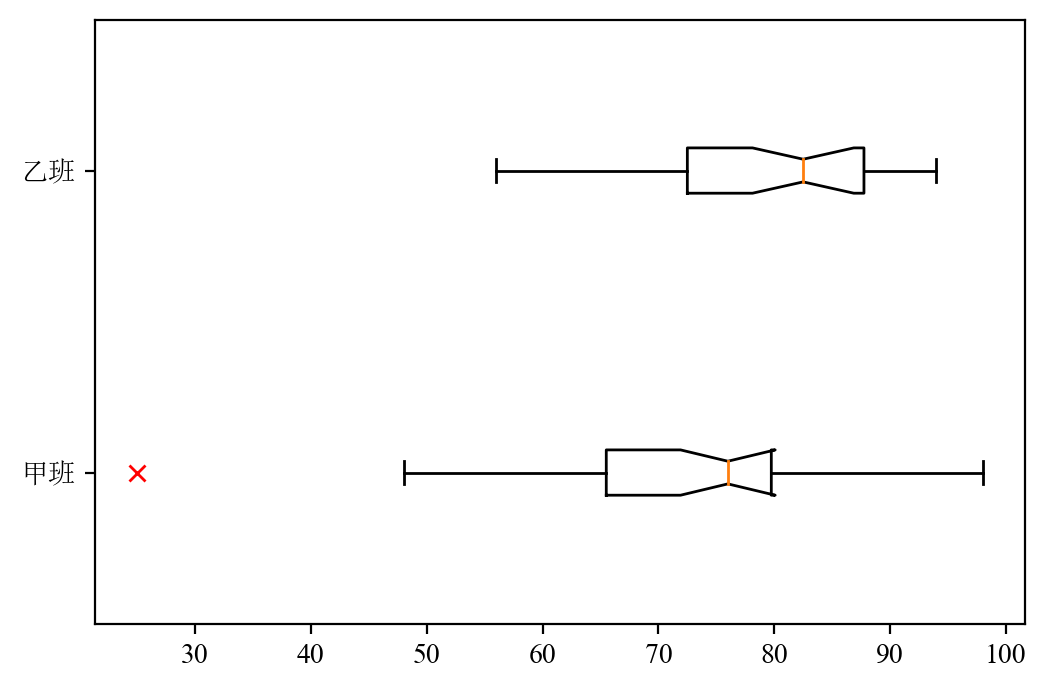

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df, notch=True, sym='xr', vert=False, whis=1.5, labels=['甲班', '乙班'])
fig.show()

#### 3. 经验分布函数
当 $n\to\infty$ 时，经验分布函数 $F_n(x)$ 以概率 1 一致收敛于分布函数 $F(x)$。因此当样本容量足够大时，经验分布函数的任一个观察值与总体分布函数只有微小的差别，从而在实际上可以当作 $F(x)$ 来使用

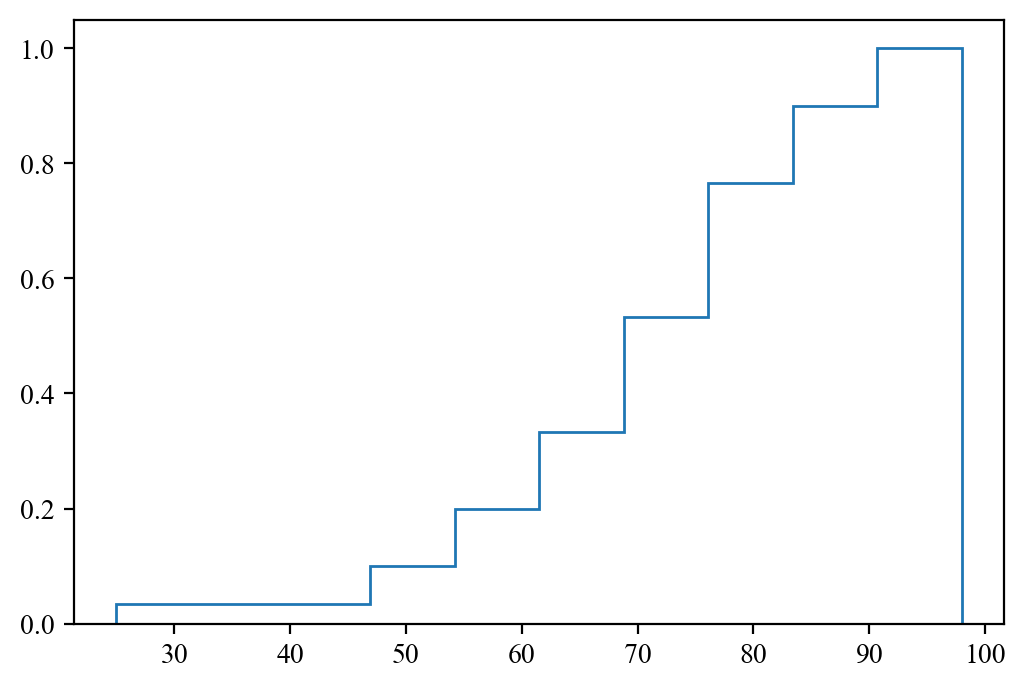

In [8]:
d1 = df[0]
h1 = plt.hist(d1, density=True, histtype='step', cumulative=True)
plt.show()

#### 4. Q-Q 图
Q-Q 图是检验拟合优度的方法

将经验分布函数的分位数点和分布模型的理论分位数点作为一对数对画在直角坐标图上，$n$ 个观测数据对应 $n$ 个点，如果这 $n$ 个点看起来像一条直线，说明观测数据与分布模型的拟合效果较好

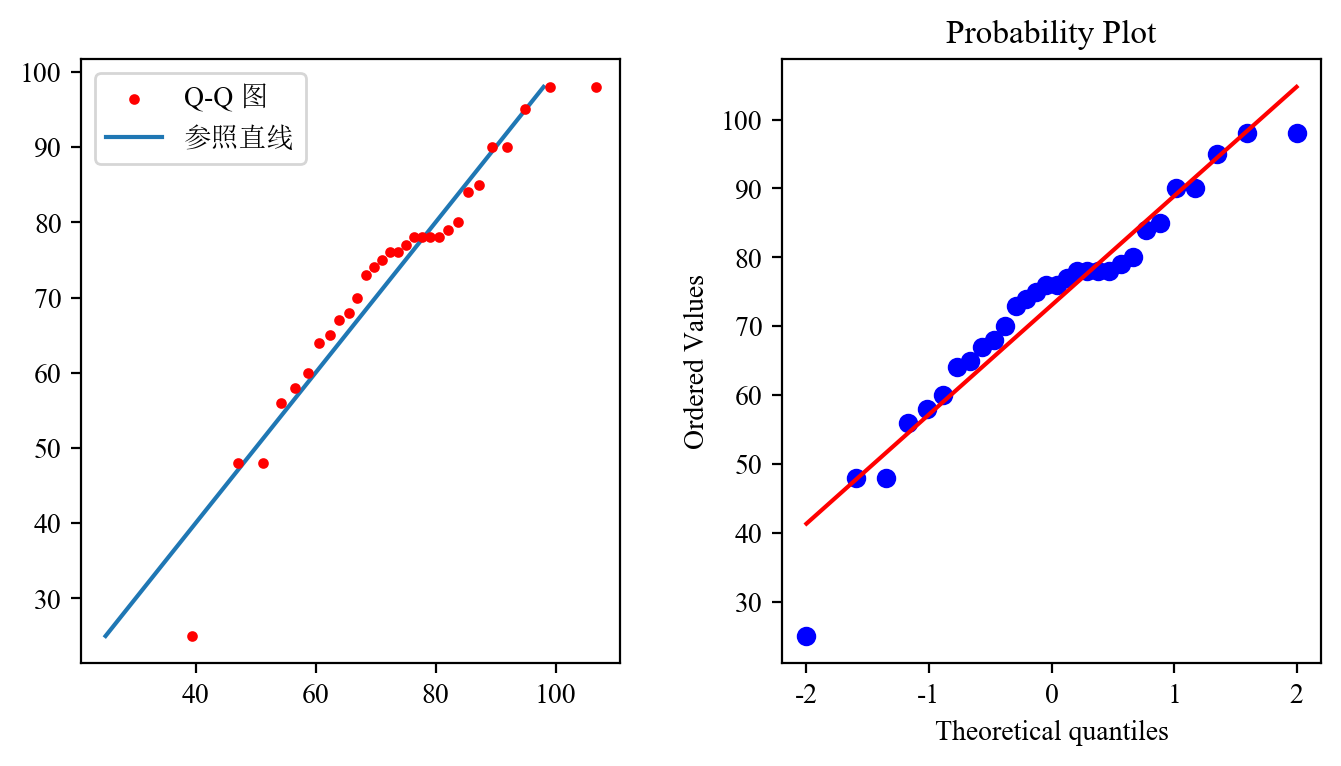

In [9]:
from scipy.stats import norm, probplot

df = pd.read_csv('../../09第9章  数据的描述性统计方法/data9_5.txt', header=None)
d1 = df.T[0]
n = len(d1)
mu = d1.mean()
sigma = d1.std()
x = (np.arange(n) + 1/2)/n
yi = norm.ppf(x, mu, sigma)
xi = sorted(d1)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.scatter(yi, xi, color='r', zorder=10, s=8, label='Q-Q 图')
ax.plot(xi, xi, label='参照直线')
ax.legend()

ax1 = fig.add_subplot(122)
probplot(d1, plot=plt)

fig.subplots_adjust(wspace=0.3)
fig.show()